 <font size="3" color ="#990018"  >Hi ,Today we will conduct data analysis using the earthquakes in Turkey data we have. </font>
* What we want to know:
1. Correlation between features
1. Which year had the most earthquakes in Turkey?
1. Where was the most earthquake?
1. Which country was the most earthquake?
1. How long did the earthquake last?
1. Where and when did the most severe earthquake occur?



 So let's start.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns #visualization
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/earthquake/earthquake.csv


In [2]:
data = pd.read_csv("../input/earthquake/earthquake.csv")

In [3]:
data.head(10)


,id,date,time,lat,long,country,city,area,direction,dist,depth,xm,md,richter,mw,ms,mb
0,2.000000e+13,2003.05.20,12:17:44 AM,39.04,40.38,turkey,bingol,baliklicay,west,0.1,10.0,4.1,4.1,0.0,NaN,0.0,0.0
1,2.010000e+13,2007.08.01,12:03:08 AM,40.79,30.09,turkey,kocaeli,bayraktar_izmit,west,0.1,5.2,4.0,3.8,4.0,NaN,0.0,0.0
2,1.980000e+13,1978.05.07,12:41:37 AM,38.58,27.61,turkey,manisa,hamzabeyli,south_west,0.1,0.0,3.7,0.0,0.0,NaN,0.0,3.7
3,2.000000e+13,1997.03.22,12:31:45 AM,39.47,36.44,turkey,sivas,kahvepinar_sarkisla,south_west,0.1,10.0,3.5,3.5,0.0,NaN,0.0,0.0
4,2.000000e+13,2000.04.02,12:57:38 AM,40.80,30.24,turkey,sakarya,meseli_serdivan,south_west,0.1,7.0,4.3,4.3,0.0,NaN,0.0,0.0
5,2.010000e+13,2005.01.21,12:04:03 AM,37.11,27.75,turkey,mugla,demirciler_milas,south_west,0.1,32.8,3.5,3.5,0.0,NaN,0.0,0.0
6,2.010000e+13,2012.06.24,12:07:22 AM,38.75,43.61,turkey,van,ilikaynak,south_west,0.1,9.4,4.5,0.0,4.5,NaN,0.0,0.0
7,1.990000e+13,1987.12.31,12:49:54 AM,39.43,27.98,turkey,balikesir,dikkonak_bigadic,south_east,0.1,26.0,3.8,3.8,0.0,NaN,0.0,0.0
8,2.000000e+13,2000.02.07,12:11:45 AM,40.05,34.07,turkey,kirikkale,kocabas_delice,south_east,0.1,1.0,3.8,3.8,0.0,NaN,0.0,0.0
9,2.010000e+13,2011.10.28,12:47:56 AM,38.76,43.54,turkey,van,degirmenozu,south_east,0.1,3.1,4.3,0.0,4.2,NaN,0.0,4.3


In [4]:
data.info

<bound method DataFrame.info of                  id        date         time    lat   long country      city  \
0      2.000000e+13  2003.05.20  12:17:44 AM  39.04  40.38  turkey    bingol   
1      2.010000e+13  2007.08.01  12:03:08 AM  40.79  30.09  turkey   kocaeli   
2      1.980000e+13  1978.05.07  12:41:37 AM  38.58  27.61  turkey    manisa   
3      2.000000e+13  1997.03.22  12:31:45 AM  39.47  36.44  turkey     sivas   
4      2.000000e+13  2000.04.02  12:57:38 AM  40.80  30.24  turkey   sakarya   
...             ...         ...          ...    ...    ...     ...       ...   
24002  2.020000e+13  2017.03.10  12:23:42 AM  37.50  38.48  turkey  adiyaman   
24003  2.020000e+13  2017.03.10  12:42:44 AM  40.47  35.84  turkey    amasya   
24004  2.020000e+13  2017.04.05  12:08:11 AM  38.63  27.57  turkey    manisa   
24005  2.020000e+13  2017.04.05  12:35:09 AM  38.65  27.55  turkey    manisa   
24006  2.020000e+13  2017.04.05  12:25:25 AM  38.63  27.58  turkey    manisa   

       

In [5]:
data.columns

Index(['id', 'date', 'time', 'lat', 'long', 'country', 'city', 'area',
       'direction', 'dist', 'depth', 'xm', 'md', 'richter', 'mw', 'ms', 'mb'],
      dtype='object')

1. lat - latitude of earthquake
1. dist - distance of direction in km
1. richter - intensity of earthquake (Richter)
1. md - depending on time magnitude
1. mw - moment magnitude 
1. ms - surface-wave magnitude
1. mb - body-wave magnitude
* **xm** - biggest magnitude value in specified magnitude values


<font size="3" color ="#990018" >Firstly, we must create a new column only years
</font>

In [6]:
def yeardate(x):
    return x[0:4]
data["yeardate"] = data.date.apply(yeardate)
#We must change object to integer.
data['yeardate'] = data.yeardate.astype(int)
print(data.yeardate.dtypes)
data.head(3)

int64


,id,date,time,lat,long,country,city,area,direction,dist,depth,xm,md,richter,mw,ms,mb,yeardate
0,2.000000e+13,2003.05.20,12:17:44 AM,39.04,40.38,turkey,bingol,baliklicay,west,0.1,10.0,4.1,4.1,0.0,NaN,0.0,0.0,2003
1,2.010000e+13,2007.08.01,12:03:08 AM,40.79,30.09,turkey,kocaeli,bayraktar_izmit,west,0.1,5.2,4.0,3.8,4.0,NaN,0.0,0.0,2007
2,1.980000e+13,1978.05.07,12:41:37 AM,38.58,27.61,turkey,manisa,hamzabeyli,south_west,0.1,0.0,3.7,0.0,0.0,NaN,0.0,3.7,1978


<font size="3" color ="#990018">Correlation between features
</font>

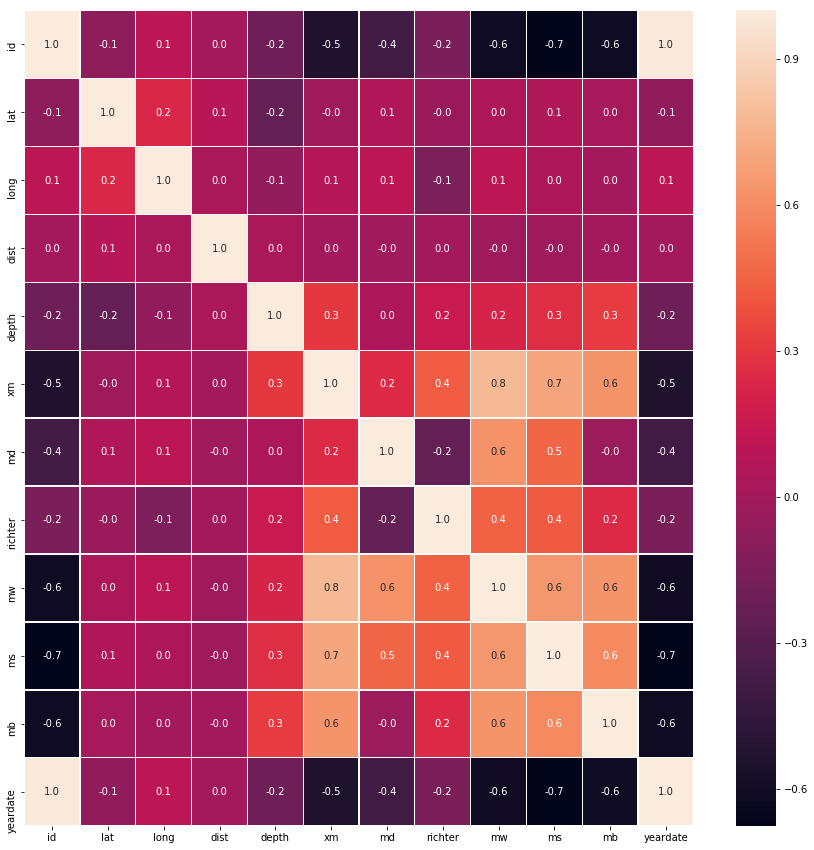

In [7]:
plt.figure(figsize=(15,15))
sns.heatmap(data.corr(), annot = True, fmt= ".1f", linewidths = .3)
plt.show()

We have possitive correlation **xm** between as **mw**, **ms** and **mb**


<font size="3" color ="#990018" >Which year had the most earthquakes in Turkey?</font>


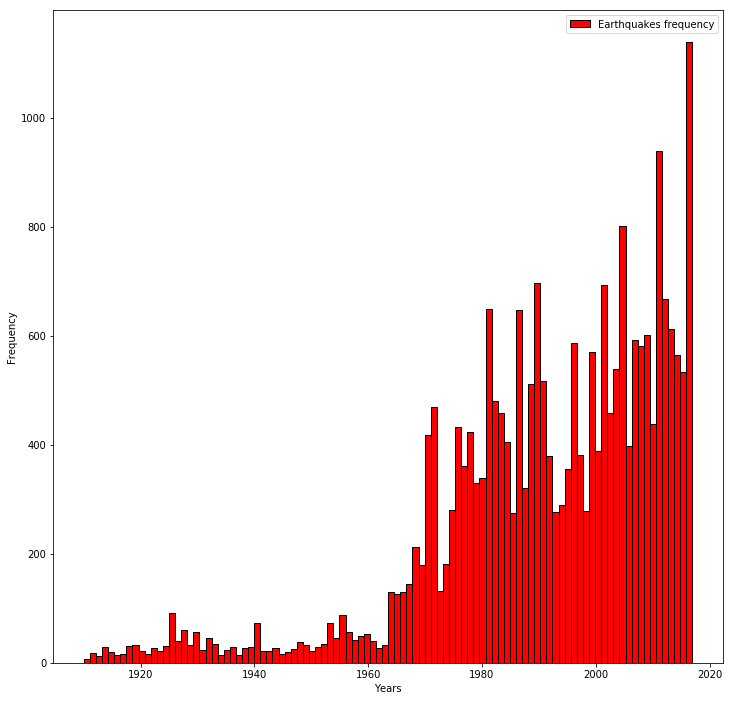

In [8]:
data.yeardate.plot(kind = "hist" , color = "red" , edgecolor="black", bins = 100 , figsize = (12,12) , label = "Earthquakes frequency")
plt.legend(loc = "upper right")
plt.xlabel("Years")
plt.show()

Maybe it is just a lost data but most earthquake occurred in 2000-2017
<font size="3" color="990018">Where was the most earthquake?</font>


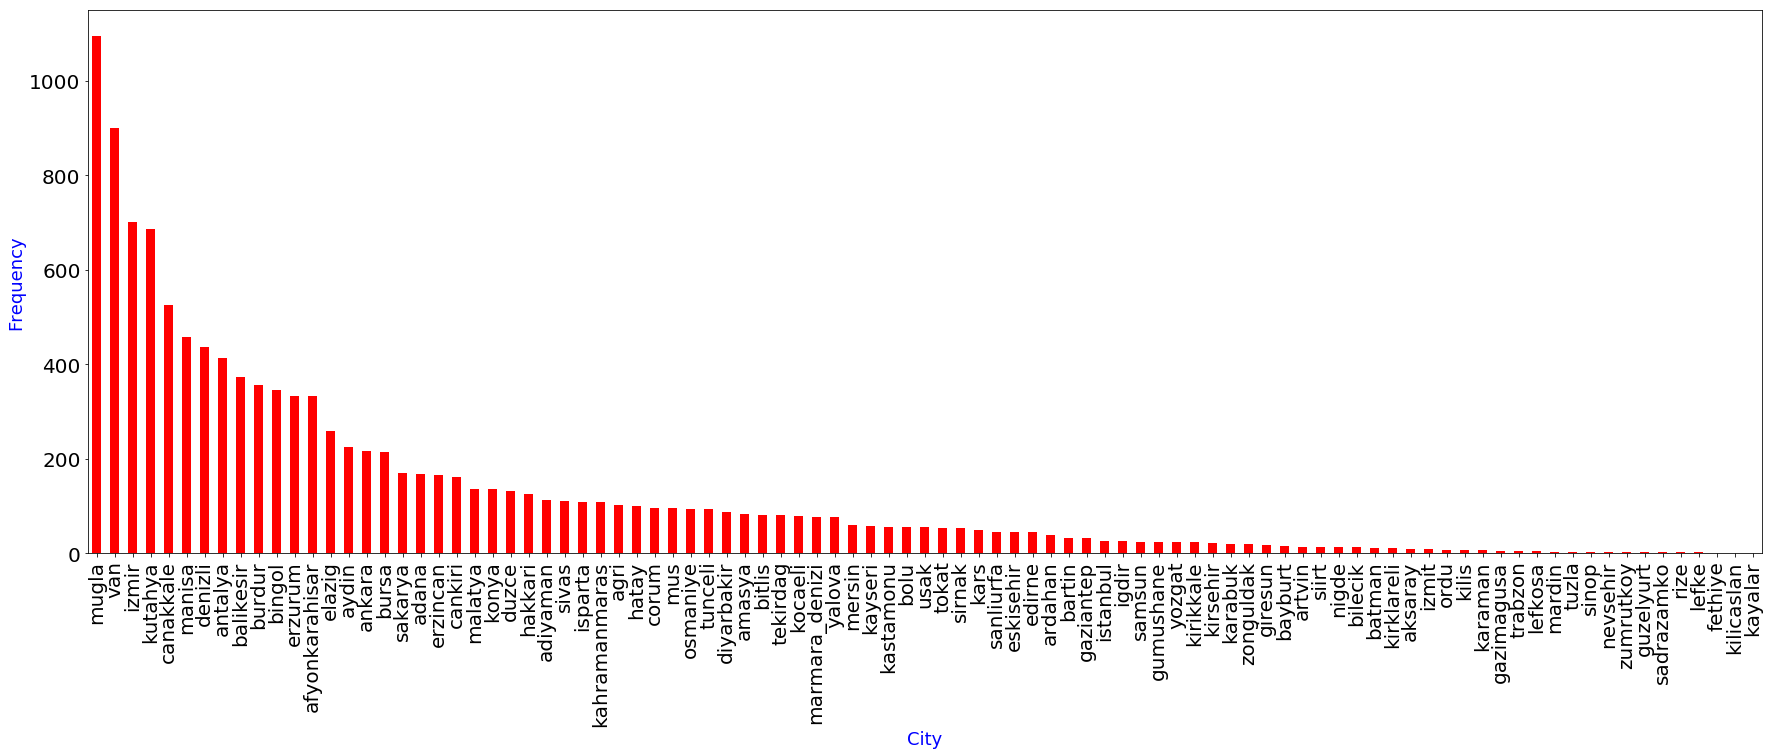

In [9]:
data.city.value_counts().plot(kind = "bar" , color = "red" , figsize = (30,10),fontsize = 20)
plt.xlabel("City",fontsize=18,color="blue")
plt.ylabel("Frequency",fontsize=18,color="blue")
plt.show()

 <font size="3" color="990018">Which country-area was the most earthquake?</font>


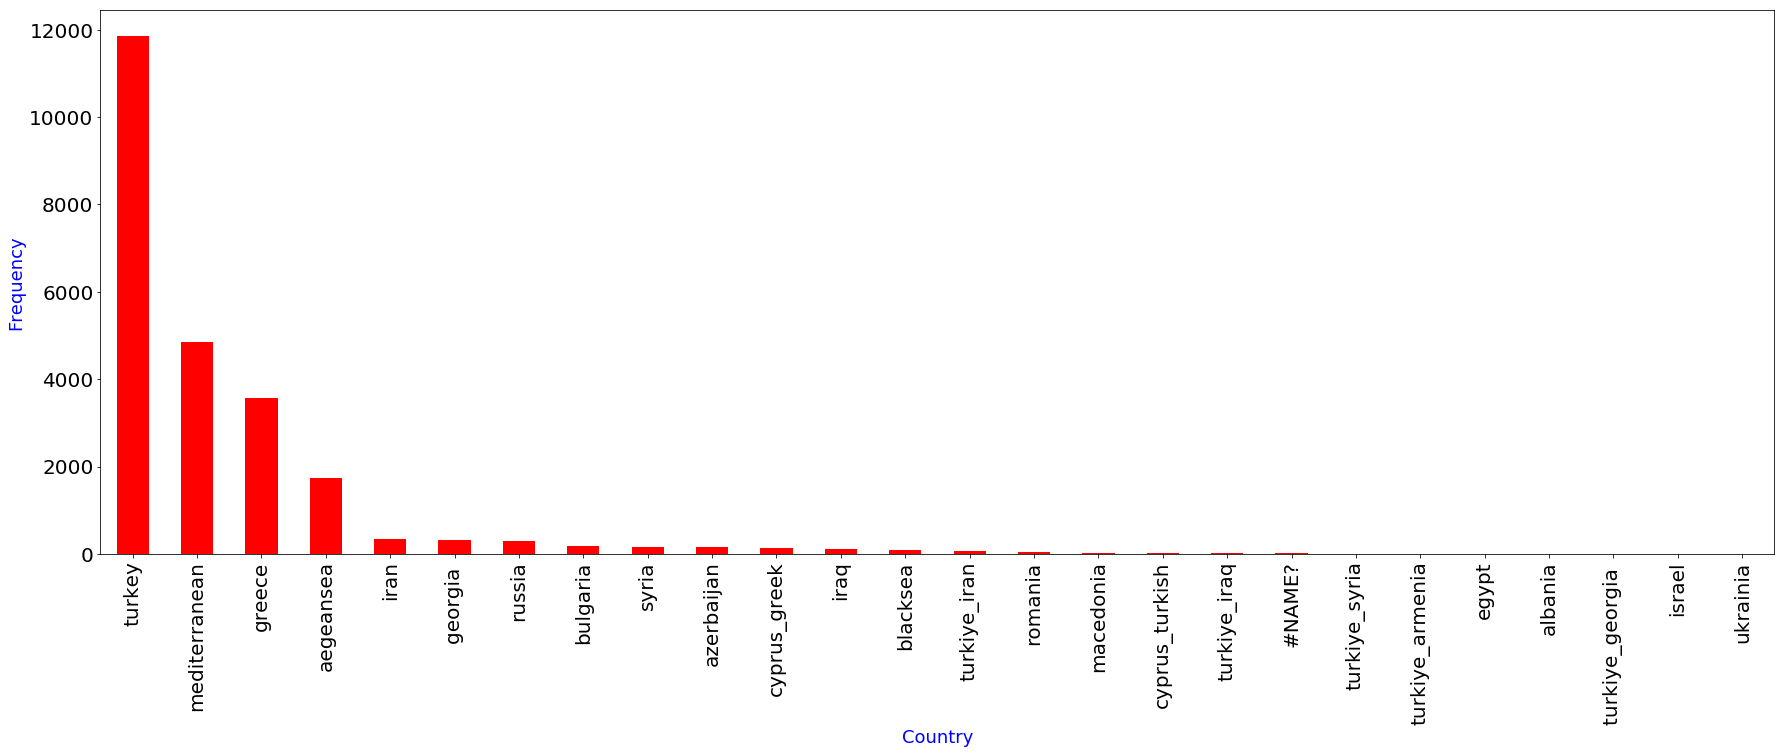

In [10]:
data.country.value_counts().plot(kind = "bar" , color = "red" , figsize = (30,10),fontsize = 20)
plt.xlabel("Country",fontsize=18,color="blue")
plt.ylabel("Frequency",fontsize=18,color="blue")
plt.show()

<font size="3" color="990018">How long did the earthquake last?</font>


In [11]:
data.long.max()
filtre = data.long == 48.0
data[filtre]

,id,date,time,lat,long,country,city,area,direction,dist,depth,xm,md,richter,mw,ms,mb,yeardate
10064,1.910000e+13,1910.12.04,12:02:00 AM,39.30,48.0,azerbaijan,NaN,NaN,NaN,NaN,37.0,5.5,5.3,5.3,5.5,5.4,5.3,1910
10068,1.910000e+13,1911.06.23,12:30:02 AM,40.00,48.0,azerbaijan,NaN,NaN,NaN,NaN,18.0,5.3,5.0,4.9,5.3,5.0,5.0,1911
10115,1.920000e+13,1915.10.06,12:59:03 AM,41.00,48.0,russia,NaN,NaN,NaN,NaN,15.0,4.8,4.7,4.6,4.8,4.6,4.7,1915
10481,1.930000e+13,1932.03.15,12:18:06 AM,34.00,48.0,iran,NaN,NaN,NaN,NaN,35.0,5.6,5.4,5.3,5.6,5.5,5.4,1932
10751,1.950000e+13,1948.08.30,12:42:01 AM,41.90,48.0,russia,NaN,NaN,NaN,NaN,31.0,5.5,5.3,5.3,5.5,5.4,5.3,1948
10872,1.950000e+13,1953.12.30,12:09:05 AM,34.00,48.0,iran,NaN,NaN,NaN,NaN,5.0,5.1,5.1,0.0,NaN,0.0,0.0,1953
11332,1.970000e+13,1965.05.15,12:43:01 AM,39.90,48.0,azerbaijan,NaN,NaN,NaN,NaN,10.0,4.4,4.2,4.2,4.4,4.0,4.3,1965
12540,1.980000e+13,1976.04.14,12:25:04 AM,40.10,48.0,azerbaijan,NaN,NaN,NaN,NaN,33.0,4.3,0.0,0.0,NaN,0.0,4.3,1976
12695,1.980000e+13,1977.01.18,12:48:54 AM,33.11,48.0,iran,NaN,NaN,NaN,NaN,49.0,5.2,0.0,0.0,NaN,5.2,5.2,1977


 <font size="3" color="990018">Where and when did the most severe earthquake occur?</font>

In [12]:
data.xm.max()
filtering = data.country == "turkey"
filtering2 = data.xm == 7.9
data[filtering & filtering2]

,id,date,time,lat,long,country,city,area,direction,dist,depth,xm,md,richter,mw,ms,mb,yeardate
6717,1.940000e+13,1939.12.26,12:57:21 AM,39.8,39.51,turkey,erzincan,kurutilek,north_east,3.0,20.0,7.9,7.2,7.2,7.7,7.9,7.1,1939


 <font size="3" color="990018">Earthquake - Magnitude level</font>

In [13]:
threshold = sum(data.xm) / len(data.xm)
data["magnitude-level"] = ["hight" if i > threshold else "low" for i in data.xm]
data.loc[:10,["magnitude-level","xm","city"]]

,magnitude-level,xm,city
0,hight,4.1,bingol
1,low,4.0,kocaeli
2,low,3.7,manisa
3,low,3.5,sivas
4,hight,4.3,sakarya
5,low,3.5,mugla
6,hight,4.5,van
7,low,3.8,balikesir
8,low,3.8,kirikkale
9,hight,4.3,van
